## Using Foresight and sklearn

In [16]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification as makec
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import *
######
import FSRF
#allow realtime editing of the class 
reload(FSRF)
FSRF = FSRF.FSRF

I've `sklearn`-ized the approach you suggested. FSRF(currrently made for Classification problems) has methods such as:
1. predict
2. predict_proba
3. fit
4. getparams
5. setparams

On this toy example, FSRF performing better sir. 

#### Making Data

In [4]:
n_classes = 10
n_features = 10 * n_classes
Xd1, yd1 = makec(n_samples=10000, n_features=n_features, n_informative=int(n_features*0.1), n_redundant=3, 
                n_repeated=2, n_classes=n_classes)
Xtrain, Xtest, Ytrain, Ytest = train_test_split(Xd1, yd1 , train_size=0.1, test_size=0.9, random_state=42)
###
nfeats = 5
ntrees = 100

#### Training

`sklearn.RandomForestClassifier` versus `ForeSight enabled RandomForestclassifier`

on varying only two hyperparameters: `nfeats` and `ntrees`

In [6]:
# sklearn
rf = RandomForestClassifier(n_estimators=ntrees, max_features=nfeats)
rf.fit(Xtrain, Ytrain)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features=5, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [13]:
# fsrf
fsrf = FSRF(ntrees,nfeats)
fsrf.fit(Xtrain,Ytrain)

#### Predictions

In [14]:
rf_pred = rf.predict(Xtest)
fsrf_pred = fsrf.predict(Xtest)

In [15]:
print "f1 score for sklearn.RF        {0:.3f}".format(f1_score(Ytest, rf_pred, average='micro'))
print "f1 score for Foresight.RF      {0:.3f}".format(f1_score(Ytest, fsrf_pred, average='micro'))

f1 score for sklearn.RF        0.357
f1 score for Foresight.RF      0.391


In [17]:
print classification_report(Ytest,rf_pred)

             precision    recall  f1-score   support

          0       0.33      0.48      0.39       890
          1       0.33      0.16      0.22       906
          2       0.26      0.61      0.36       874
          3       0.49      0.25      0.33       906
          4       0.37      0.17      0.23       918
          5       0.41      0.32      0.36       914
          6       0.50      0.30      0.38       919
          7       0.31      0.47      0.37       873
          8       0.44      0.52      0.47       893
          9       0.44      0.31      0.36       907

avg / total       0.39      0.36      0.35      9000



In [18]:
print classification_report(Ytest,fsrf_pred)

             precision    recall  f1-score   support

          0       0.33      0.49      0.40       890
          1       0.36      0.23      0.28       906
          2       0.32      0.63      0.43       874
          3       0.53      0.27      0.36       906
          4       0.42      0.22      0.29       918
          5       0.43      0.34      0.38       914
          6       0.49      0.33      0.39       919
          7       0.36      0.51      0.42       873
          8       0.43      0.56      0.49       893
          9       0.44      0.35      0.39       907

avg / total       0.41      0.39      0.38      9000



#### Feature importances

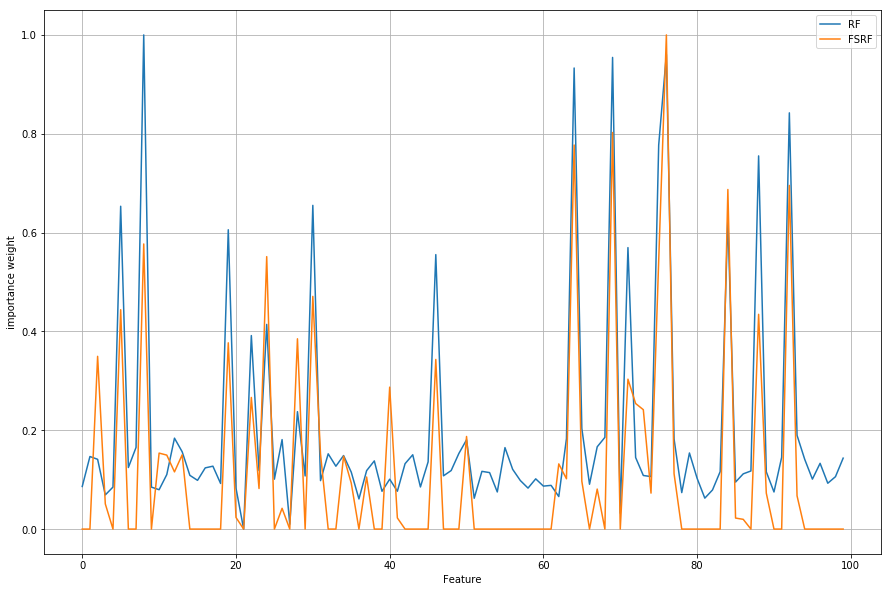

In [25]:
figu = plt.figure(figsize=(15,10))
#feature importance for RF
feature_importances_ = rf.feature_importances_ - np.amin(rf.feature_importances_)
feature_importances_ = feature_importances_/np.amax(feature_importances_)
_ = plt.plot(np.arange(n_features), feature_importances_, label='RF')

#feature importances for FSRF
feature_importances_ = fsrf.feature_importances_ - np.amin(fsrf.feature_importances_)
feature_importances_ = feature_importances_/np.amax(feature_importances_)
_ = plt.plot(np.arange(n_features), feature_importances_, label='FSRF')
plt.legend()
plt.xlabel('Feature')
plt.ylabel('importance weight')
plt.grid(True)
plt.show()

The peaks of feature importances of `sklearn.RF` and `FSRF` match perfectly. I've computed the feature importances in a different way. Instead of just counting number of times a feature was selected, I thought of including the feature importances of each Decision Tree to compute the overall feature importances. 

The features which are used for training a Decision Tree get their feature importances from that Decision Tree itself. And those, which aren't, are set to zero by default. Hence we see some features have feature importances as zero in the plot(follow yellow line). 